**Table of Contents**

The table of contents for this project is as follows:-

Introduction to Logistic Regression

Logistic Regression intuition

The problem statement

Dataset description

Import libraries

Import dataset

Exploratory data analysis

Declare feature vector and target variable

Split data into separate training and test set

Feature engineering

Feature scaling

Model training

Predict results

Check accuracy score

Confusion matrix

Classification metrices

Adjusting the threshold level

ROC - AUC

Recursive feature elimination

k-Fold Cross Validation

**Results & Conclusion**

**The problem statement**

In this project, I try to answer the question that whether or not it will rain tomorrow in Australia. I implement Logistic Regression with Python and Scikit-Learn.

To answer the question, I build a classifier to predict whether or not it will rain tomorrow in Australia by training a binary classification model using Logistic Regression. I have used the Rain in Australia dataset downloaded from the Kaggle website for this project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
df.shape

(142193, 24)

In [ ]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

Drop RISK_MM variable



It is given in the dataset description, that we should drop the RISK_MM feature variable from the dataset description. So, we should drop it as follows-

In [ ]:
df.drop('RISK_MM',axis=1,inplace=True)

In [ ]:
from seaborn import categorical
categorical = [var for var in df.columns if df[var].dtype =="O"]

There is a date variable. It is denoted by Date column.


There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.


There are two binary categorical variables - RainToday and RainTomorrow.


RainTomorrow is the target variable.

In [ ]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [ ]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [ ]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

In [ ]:
# catogiries that containing missing values
df[cat1].isnull().sum()

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

Number of labels: cardinality


The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [ ]:
for var in categorical: 
    
    print(df[var].value_counts())

2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964

In [ ]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['year'] = df['Date'].dt.year

In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
df['day'] = df['Date'].dt.day

In [ ]:
# In the above i was created a new columns for the Date column so iam droping the old column

In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

#df['Location'] = pd.get_dummies(df['Location'],drop_first=True)

In [ ]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [ ]:
df['WindGustDir'].value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

dummy_na: It adds a column to indicate NaN values, default value is false, If false NaNs are ignored.

In [ ]:
pd.get_dummies(df['WindGustDir'],drop_first=True,dummy_na=False)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142190,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
142191,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN    9330
dtype: int64

In [ ]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [ ]:
df['WindDir9am'].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [ ]:
pd.get_dummies(df['WindDir9am'],drop_first=True,dummy_na=False)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
142189,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
142190,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
142191,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7735
ESE     7558
N      11393
NE      7527
NNE     7948
NNW     7840
NW      8552
S       8493
SE      9162
SSE     8966
SSW     7448
SW      8237
W       8260
WNW     7194
WSW     6843
NaN    10013
dtype: int64

In [ ]:
pd.get_dummies(df['WindDir3pm'],drop_first=True,dummy_na=False)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142190,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
142191,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [ ]:
pd.get_dummies(df['RainToday'],drop_first=True,dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
#pd.get_dummies(df['RainTomorrow'],drop_first=True,dummy_na=True).sum(axis=0)

In [ ]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

# there are 1406 missing values in raintoday column

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31455
NaN     1406
dtype: int64

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

In [ ]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [ ]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
year                 0
Month                0
day                  0
dtype: int64

In [ ]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
year                 0
Month                0
day                  0
dtype: int64

In [ ]:
# outliers

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

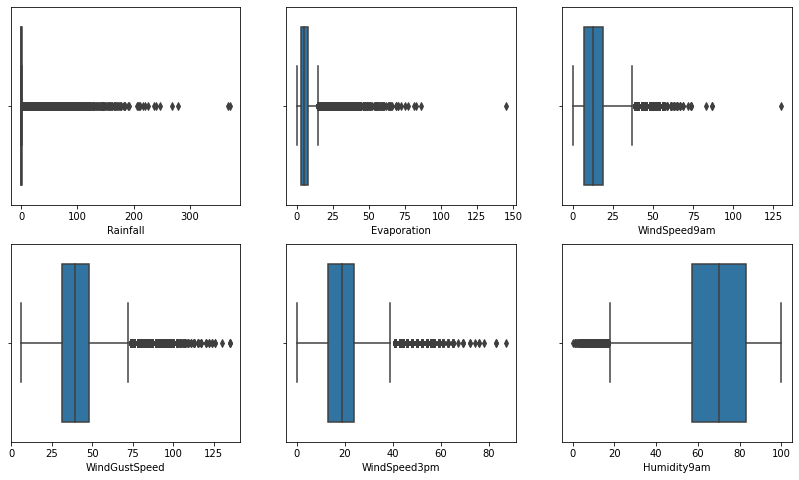

In [ ]:
fig,axes=plt.subplots(2,3, figsize=(14,8))
sns.boxplot(df['Rainfall'],ax = axes[0,0])
sns.boxplot(df['Evaporation'],ax = axes[0,1])
sns.boxplot(df['WindGustSpeed'],ax = axes[1,0])
sns.boxplot(df['WindSpeed3pm'],ax = axes[1,1])
sns.boxplot(df['Humidity9am'],ax = axes[1,2])
sns.boxplot(df['WindSpeed9am'],ax = axes[0,2])
plt.show()

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# Splitting data

In [ ]:
x = df.drop('RainTomorrow',axis=1)

In [ ]:
y = df['RainTomorrow'].values

In [ ]:
# training data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
x_train.shape

(99535, 24)

In [ ]:
x_test.shape

(42658, 24)

In [ ]:
# display categorical variables

categorical = [col for col in x_train.columns if x_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
# display numerical variables

numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'Month',
 'day']

In [ ]:
x_train[numerical].isnull().sum()

MinTemp            445
MaxTemp            221
Rainfall           995
Evaporation      42562
Sunshine         47481
WindGustSpeed     6535
WindSpeed9am       980
WindSpeed3pm      1860
Humidity9am       1259
Humidity3pm       2534
Pressure9am       9806
Pressure3pm       9776
Cloud9am         37586
Cloud3pm         39919
Temp9am            638
Temp3pm           1907
year                 0
Month                0
day                  0
dtype: int64

In [ ]:
x_test[numerical].isnull().sum()

MinTemp            192
MaxTemp            101
Rainfall           411
Evaporation      18281
Sunshine         20335
WindGustSpeed     2735
WindSpeed9am       368
WindSpeed3pm       770
Humidity9am        515
Humidity3pm       1076
Pressure9am       4208
Pressure3pm       4205
Cloud9am         16071
Cloud3pm         17175
Temp9am            266
Temp3pm            819
year                 0
Month                0
day                  0
dtype: int64

In [ ]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if x_train[col].isnull().mean()>0:
        print(col, round(x_train[col].isnull().mean(),4))

MinTemp 0.0045
MaxTemp 0.0022
Rainfall 0.01
Evaporation 0.4276
Sunshine 0.477
WindGustSpeed 0.0657
WindSpeed9am 0.0098
WindSpeed3pm 0.0187
Humidity9am 0.0126
Humidity3pm 0.0255
Pressure9am 0.0985
Pressure3pm 0.0982
Cloud9am 0.3776
Cloud3pm 0.4011
Temp9am 0.0064
Temp3pm 0.0192


In [ ]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [x_train, x_test]:
    for col in numerical:
        col_median=x_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [ ]:
x_test[numerical].isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
Month            0
day              0
dtype: int64

In [ ]:
# print categorical variables with missing data

for col in categorical:
    if x_train[col].isnull().mean()>0:
        print(col, (x_train[col].isnull().mean()))

WindGustDir 0.06604711910383282
WindDir9am 0.07061837544582308
WindDir3pm 0.026804641583362637
RainToday 0.0099964836489677


In [ ]:
# impute missing categorical variables with most frequent value

for df2 in [x_train, x_test]:
    df2['WindGustDir'].fillna(x_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(x_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(x_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(x_train['RainToday'].mode()[0], inplace=True)

In [ ]:
# check missing values in categorical variables in X_train

x_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
# check missing values in X_train

x_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
year             0
Month            0
day              0
dtype: int64

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [x_train, x_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [ ]:
x_train.Rainfall.max(), x_test.Rainfall.max()
(3.2, 3.2)
x_train.Evaporation.max(), x_test.Evaporation.max()
(21.8, 21.8)
x_train.WindSpeed9am.max(), x_test.WindSpeed9am.max()
(55.0, 55.0)
x_train.WindSpeed3pm.max(), x_test.WindSpeed3pm.max()
(57.0, 57.0)
x_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,day
count,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000,99535.000000
mean,12.218711,23.245237,0.677879,5.148892,7.988669,39.908625,13.995007,18.628935,68.839011,51.506716,1017.637439,1015.254013,4.649932,4.699513,17.013967,21.696063,2012.755734,6.400241,15.702657
std,6.388570,7.104605,1.186075,2.813860,2.765426,13.129874,8.828808,8.700041,18.905611,20.508063,6.746307,6.681954,2.295289,2.121710,6.464501,6.867949,2.537140,3.429085,8.802031
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.700000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.300000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.900000,28.300000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.600000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1040.900000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [ ]:
x_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
3024,BadgerysCreek,ENE,ENE,NE,No
74333,Portland,N,N,N,No
135526,AliceSprings,SE,WSW,SE,No
56643,Ballarat,W,NW,W,No
99726,MountGambier,W,SW,WSW,Yes


In [ ]:
pip install category_encoders

In [ ]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [ ]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,year,Month,day
3024,BadgerysCreek,15.9,39.9,0.0,4.8,8.4,ENE,50.0,ENE,NE,...,1009.6,5.0,5.0,23.9,39.2,0,1,2009,1,14
74333,Portland,5.3,14.7,0.0,2.4,9.8,N,43.0,N,N,...,1016.0,5.0,5.0,8.5,14.6,0,1,2013,8,1
135526,AliceSprings,9.0,22.5,0.0,3.6,8.4,SE,19.0,WSW,SE,...,1018.5,8.0,1.0,14.3,22.0,0,1,2016,5,18
56643,Ballarat,7.0,15.1,0.4,4.8,8.4,W,31.0,NW,W,...,1022.9,8.0,8.0,10.2,14.5,0,1,2017,4,28
99726,MountGambier,5.9,13.7,2.8,4.8,8.4,W,50.0,SW,WSW,...,1019.3,8.0,7.0,10.7,11.7,1,0,2016,10,11


In [ ]:
x_train = pd.concat([x_train[numerical], x_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_train.Location), 
                     pd.get_dummies(x_train.WindGustDir),
                     pd.get_dummies(x_train.WindDir9am),
                     pd.get_dummies(x_train.WindDir3pm)], axis=1)

In [ ]:
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
3024,15.9,39.9,0.0,4.8,8.4,50.0,6.0,13.0,70.0,21.0,...,0,0,0,0,0,0,0,0,0,0
74333,5.3,14.7,0.0,2.4,9.8,43.0,17.0,20.0,71.0,59.0,...,0,0,0,0,0,0,0,0,0,0
135526,9.0,22.5,0.0,3.6,8.4,19.0,9.0,13.0,68.0,29.0,...,0,0,0,1,0,0,0,0,0,0
56643,7.0,15.1,0.4,4.8,8.4,31.0,9.0,19.0,100.0,96.0,...,0,0,0,0,0,0,0,1,0,0
99726,5.9,13.7,2.8,4.8,8.4,50.0,31.0,20.0,68.0,76.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_test = pd.concat([x_test[numerical], x_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_test.Location), 
                     pd.get_dummies(x_test.WindGustDir),
                     pd.get_dummies(x_test.WindDir9am),
                     pd.get_dummies(x_test.WindDir3pm)], axis=1)

In [ ]:
x_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
82249,20.8,30.5,0.0,7.0,12.2,33.0,9.0,19.0,61.0,52.0,...,0,0,0,0,0,0,0,0,0,0
106453,15.2,18.4,0.8,5.6,0.0,39.0,19.0,20.0,70.0,63.0,...,0,0,0,1,0,0,0,0,0,0
133168,9.9,30.7,0.0,8.0,11.0,44.0,11.0,19.0,28.0,11.0,...,0,1,0,0,0,0,0,0,0,0
93050,25.3,33.7,0.0,7.0,9.1,33.0,13.0,20.0,72.0,48.0,...,0,0,0,0,0,0,0,0,0,0
110321,7.9,19.7,0.4,4.8,8.4,52.0,15.0,26.0,62.0,58.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45475,11.4,16.4,3.2,2.6,0.3,35.0,15.0,19.0,88.0,76.0,...,0,0,0,1,0,0,0,0,0,0
89919,20.0,27.6,0.0,4.8,8.4,39.0,26.0,20.0,65.0,63.0,...,0,0,0,1,0,0,0,0,0,0
43942,14.1,25.3,0.0,4.8,8.4,44.0,17.0,19.0,45.0,25.0,...,0,1,0,0,0,0,0,0,0,0
125378,16.0,22.8,0.0,4.8,8.4,35.0,11.0,15.0,69.0,63.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
3024,15.9,39.9,0.0,4.8,8.4,50.0,6.0,13.0,70.0,21.0,...,0,0,0,0,0,0,0,0,0,0
74333,5.3,14.7,0.0,2.4,9.8,43.0,17.0,20.0,71.0,59.0,...,0,0,0,0,0,0,0,0,0,0
135526,9.0,22.5,0.0,3.6,8.4,19.0,9.0,13.0,68.0,29.0,...,0,0,0,1,0,0,0,0,0,0
56643,7.0,15.1,0.4,4.8,8.4,31.0,9.0,19.0,100.0,96.0,...,0,0,0,0,0,0,0,1,0,0
99726,5.9,13.7,2.8,4.8,8.4,50.0,31.0,20.0,68.0,76.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28003,4.1,20.4,0.0,8.6,8.4,24.0,0.0,9.0,76.0,50.0,...,0,0,0,0,1,0,0,0,0,0
21984,15.4,19.4,0.0,5.6,11.2,52.0,26.0,31.0,59.0,53.0,...,0,0,0,0,0,1,0,0,0,0
6806,5.1,16.3,0.0,3.8,8.4,30.0,9.0,13.0,76.0,46.0,...,0,0,0,0,0,0,1,0,0,0
34838,17.8,24.0,0.0,6.2,1.2,57.0,7.0,20.0,58.0,68.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
cols = x_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
lr = LogisticRegression(C=0.01,solver='liblinear',random_state=0)

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
# prediction
y_pred = lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
y_test

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
y_pred_prob = lr.predict_proba(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_pred_prob = lr.predict_proba(x_test)[:,1]   # to get only probability of purchasing column 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_pred_prob

array([0.06035745, 0.41596169, 0.01797749, ..., 0.10634216, 0.2047122 ,
       0.12112468])

In [ ]:
y_pred_prob>0.7 # if we want more accuracy of proba of purchasing then threshold val morethan 0.5

array([False, False, False, ..., False, False, False])

In [ ]:
y_test

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
print('test score:', accuracy_score(y_test,y_pred)*100,'%')

test score: 83.93736227671246 %


In [ ]:
y_pred_train = lr.predict(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print('train score:', accuracy_score(y_train,y_pred_train)*100,'%')

train score: 84.19852313256644 %


In [ ]:
print('test score:',accuracy_score(y_test,y_pred)*100,'%')

test score: 83.93736227671246 %


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[31538,  1515],
       [ 5337,  4268]])

In [ ]:
from mlxtend.plotting import plot_decision_regions,plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd9528001d0>)

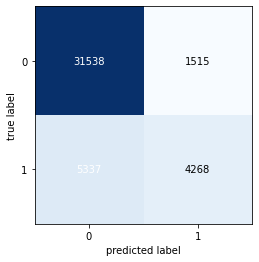

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     33053
         Yes       0.74      0.44      0.55      9605

    accuracy                           0.84     42658
   macro avg       0.80      0.70      0.73     42658
weighted avg       0.83      0.84      0.82     42658



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8394


In [ ]:
# print classification error

classification_error = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.8394


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9542


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8553


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8553


In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2620


In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = lr.predict_proba(x_test)[0:10]

y_pred_prob

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([[0.93964255, 0.06035745],
       [0.58403831, 0.41596169],
       [0.98202251, 0.01797749],
       [0.81212822, 0.18787178],
       [0.86204533, 0.13795467],
       [0.84506955, 0.15493045],
       [0.60903365, 0.39096635],
       [0.89305178, 0.10694822],
       [0.93986449, 0.06013551],
       [0.98246189, 0.01753811]])

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.939643,0.060357
1,0.584038,0.415962
2,0.982023,0.017977
3,0.812128,0.187872
4,0.862045,0.137955
5,0.845070,0.154930
6,0.609034,0.390966
7,0.893052,0.106948
8,0.939864,0.060136
9,0.982462,0.017538


**Observations**

In each row, the numbers sum to 1.
There are 2 columns which correspond to 2 classes - 0 and 1.


Class 0 - predicted probability that there is no rain tomorrow.

Class 1 - predicted probability that there is rain tomorrow.

Importance of predicted probabilities

We can rank the observations by probability of rain or no rain.

In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

print(lr.predict_proba(x_test)[0:10, 1])

[0.06035745 0.41596169 0.01797749 0.18787178 0.13795467 0.15493045
 0.39096635 0.10694822 0.06013551 0.01753811]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = lr.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Text(0, 0.5, 'Frequency')

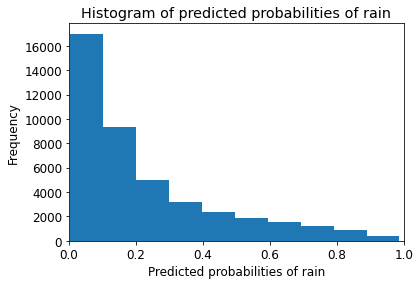

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

Observations

We can see that the above histogram is highly positive skewed.

The first column tell us that there are approximately 15000 observations with probability between 0.0 and 0.1.

There are small number of observations with probability > 0.5.
So, these small number of observations predict that there will be rain tomorrow.

Majority of observations predict that there will be no rain tomorrow.

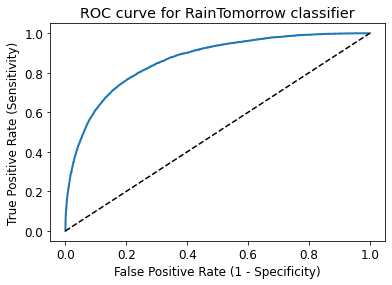

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC AUC

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8639


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(lr, x_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Cross validated ROC AUC : 0.8596


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


**Recursive Feature Elimination with Cross Validation**

Recursive feature elimination (RFE) is a feature selection technique that helps us to select best features from the given number of features. At first, the model is built on all the given features. Then, it removes the least useful predictor and build the model again. This process is repeated until all the unimportant features are removed from the model.

In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=lr, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 48


In [ ]:
# transform the training data

X_train_rfecv = rfecv.transform(x_train)


# train classifier

lr.fit(X_train_rfecv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
# test classifier on test data

X_test_rfecv = rfecv.transform(x_test)

y_pred_rfecv = lr.predict(X_test_rfecv)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(lr.score(X_test_rfecv,y_test)))

Classifier score: 0.8389


In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[31538  1515]
 [ 5357  4248]]

True Positives(TP1) =  31538

True Negatives(TN1) =  4248

False Positives(FP1) =  1515

False Negatives(FN1) =  5357


In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Cross-validation scores:[0.84060883 0.84005626 0.83784598 0.8414628  0.84086   ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8402


In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8482


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GridSearch CV score on test set: 0.8460


 **Results and Conclusion**


The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

The model shows no signs of overfitting.

Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Increasing the threshold level results in increased accuracy.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.

Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.